In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('productanalyst_assignmentdata.csv')

In [3]:
df.dtypes

shop_date       object
lodging_name    object
market          object
num_guests       int64
check_in        object
check_out       object
advance          int64
los              int64
hopper_price    object
competitor_1    object
competitor_2    object
competitor_3    object
competitor_4    object
dtype: object

In [4]:
df.head(5)

,shop_date,lodging_name,market,num_guests,check_in,check_out,advance,los,hopper_price,competitor_1,competitor_2,competitor_3,competitor_4
0,12/19/2022,Hotel 19,Atlanta,2,12/19,12/20,0,1,73,118,101,118,118
1,12/19/2022,Hotel 19,Atlanta,2,12/22,12/23,3,1,85,120,113,120,132
2,12/19/2022,Hotel 19,Atlanta,2,12/19,12/23,0,4,418,477,439,477,515
3,12/19/2022,Hotel 19,Atlanta,2,12/22,12/26,3,4,466,531,501,531,588
4,12/19/2022,Hotel 19,Atlanta,2,12/19,12/25,0,6,618,717,665,717,780


In [20]:
df = df.replace({'Sold Out': 0, 'Sold out': 0})
df['hopper_price'] = df['hopper_price'].astype(int)
df[['competitor_1','competitor_2', 'competitor_3', 'competitor_4']] = \
df[['competitor_1','competitor_2', 'competitor_3', 'competitor_4']].astype(int)
df['lowest_competitor_price'] = df[['competitor_1','competitor_2', 'competitor_3', 'competitor_4']].min(axis=1)
df['highest_competitor_price'] = df[['competitor_1','competitor_2', 'competitor_3', 'competitor_4']].max(axis=1)
df['competitive_margin'] =  df['lowest_competitor_price'] - df['hopper_price']

In [21]:
df.head(5)

,shop_date,lodging_name,market,num_guests,check_in,check_out,advance,los,hopper_price,competitor_1,competitor_2,competitor_3,competitor_4,lowest_competitor_price,highest_competitor_price,lowest_delta_competitor_price,highest_delta_competitor_price,competitive_margin
0,12/19/2022,Hotel 19,Atlanta,2,12/19,12/20,0,1,73,118,101,118,118,101,118,28,45,28
1,12/19/2022,Hotel 19,Atlanta,2,12/22,12/23,3,1,85,120,113,120,132,113,132,28,47,28
2,12/19/2022,Hotel 19,Atlanta,2,12/19,12/23,0,4,418,477,439,477,515,439,515,21,97,21
3,12/19/2022,Hotel 19,Atlanta,2,12/22,12/26,3,4,466,531,501,531,588,501,588,35,122,35
4,12/19/2022,Hotel 19,Atlanta,2,12/19,12/25,0,6,618,717,665,717,780,665,780,47,162,47


In [22]:
df['market'].unique()

array(['Atlanta', 'Austin', 'Boston', 'Cancun', 'Charlotte', 'Chicago',
       'Dallas', 'Denver', 'Fort Lauderdale', 'Honolulu', 'Houston',
       'Las Vegas', 'Los Angeles', 'Miami', 'Nashville', 'New Orleans',
       'New York', 'Orlando', 'Phoenix', 'Portland', 'San Francisco',
       'Seattle', 'Tampa', 'Temecula', 'Washington'], dtype=object)

In [23]:
len(df['market'].unique())

25

In [24]:
df['advance'].unique()

array([0, 3])

In [25]:
df['los'].unique()

array([1, 4, 6])

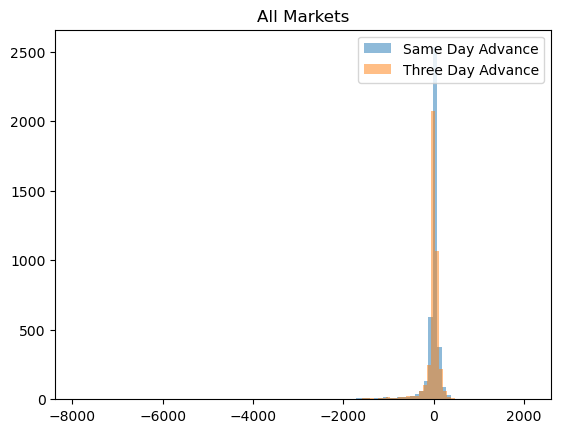

In [68]:
same_day_advance = df[df['advance']==0]
three_day_advance = df[df['advance']==3]
plt.hist(same_day_advance['competitive_margin'], bins=100, alpha=0.5, label='Same Day Advance')
plt.hist(three_day_advance['competitive_margin'], bins=100, alpha=0.5, label='Three Day Advance')
plt.legend(loc='upper right')
plt.title('All Markets')
plt.show()

In [48]:
df.groupby(['market'])[['competitive_margin']].count()

,competitive_margin
market,
Atlanta,360
Austin,356
Boston,357
Cancun,351
Charlotte,358
Chicago,360
Dallas,358
Denver,360
Fort Lauderdale,359


In [63]:
proposed_outliers = df.loc[(df['competitive_margin']<-500) | (df['competitive_margin']>500)]
proposed_outliers.groupby(['market'])[['competitive_margin']].count()

,competitive_margin
market,
Atlanta,11
Austin,19
Cancun,34
Charlotte,4
Dallas,12
Denver,1
Fort Lauderdale,17
Honolulu,43
Houston,17


In [50]:
df.groupby(['market', 'advance'])[['competitive_margin']].mean()

competitive_margin
market          advance                    
Atlanta         0                  2.033333
                3                -14.694444
Austin          0               -100.734463
                3               -104.212291
Boston          0                 37.625698
                3                 38.988764
Cancun          0               -173.210526
                3               -194.672222
Charlotte       0                 26.219101
                3                 19.627778
Chicago         0                 35.116667
                3                 45.188889
Dallas          0                -74.533708
                3                -27.361111
Denver          0                  4.227778
                3                 -4.077778
Fort Lauderdale 0                -52.793296
                3                -65.427778
Honolulu        0               -205.866667
                3               -169.711111
Houston         0                -28.300000
                3                 18.605556
Las Vegas       0                -99.650000
                3                -48.411111
Los Angeles     0                -25.183333
                3                -28.200000
Miami           0                -63.195946
                3                -58.741497
Nashville       0                 -8.914894
                3                -10.787234
New Orleans     0                -35.608392
                3                -23.680851
New York        0                -84.840580
                3                -65.133333
Orlando         0                -56.270833
                3                -78.569444
Phoenix         0                 -5.673611
                3                -42.277778
Portland        0                 27.833333
                3                  5.493056
San Francisco   0               -115.680556
                3                -34.743056
Seattle         0                 18.766917
                3                 -0.104167
Tampa           0                -40.307143
                3                 -6.699301
Temecula        0                  7.409722
                3                  1.201389
Washington      0                 23.916667
                3                 31.671329